In [2]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler , LabelEncoder , OneHotEncoder , MinMaxScaler
from imblearn.over_sampling import SMOTE
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
df = pd.read_csv("Rainfall.csv")
df    

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


In [4]:
df.isna().sum()

day                       0
pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
rainfall                  0
sunshine                  0
         winddirection    1
windspeed                 1
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df["rainfall"] = df["rainfall"].map({"yes": 1, "no": 0})

In [7]:
df

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,1,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,1,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,1,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,1,1.2,20.0,20.9


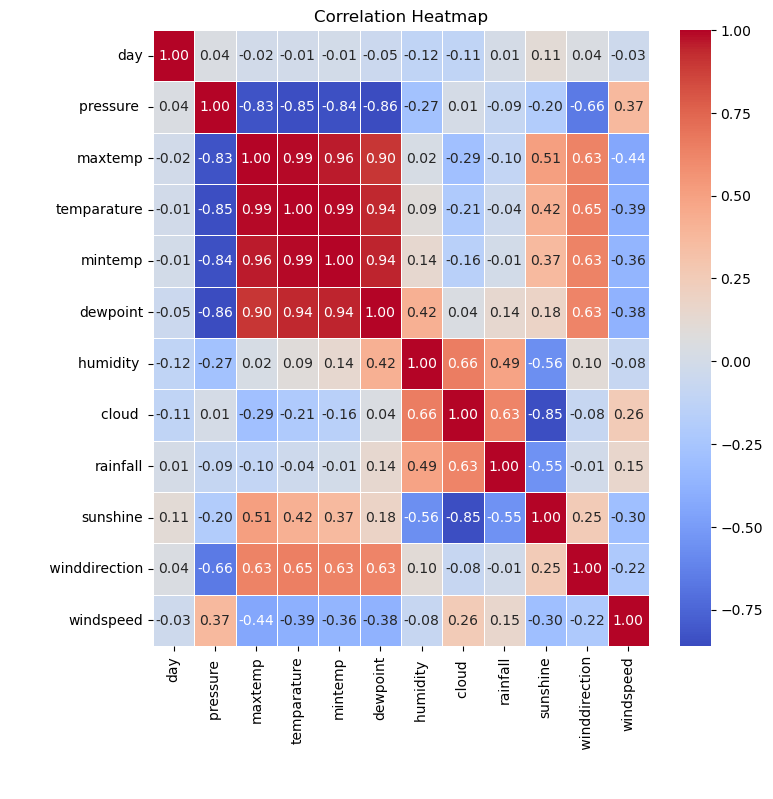

In [8]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm",fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

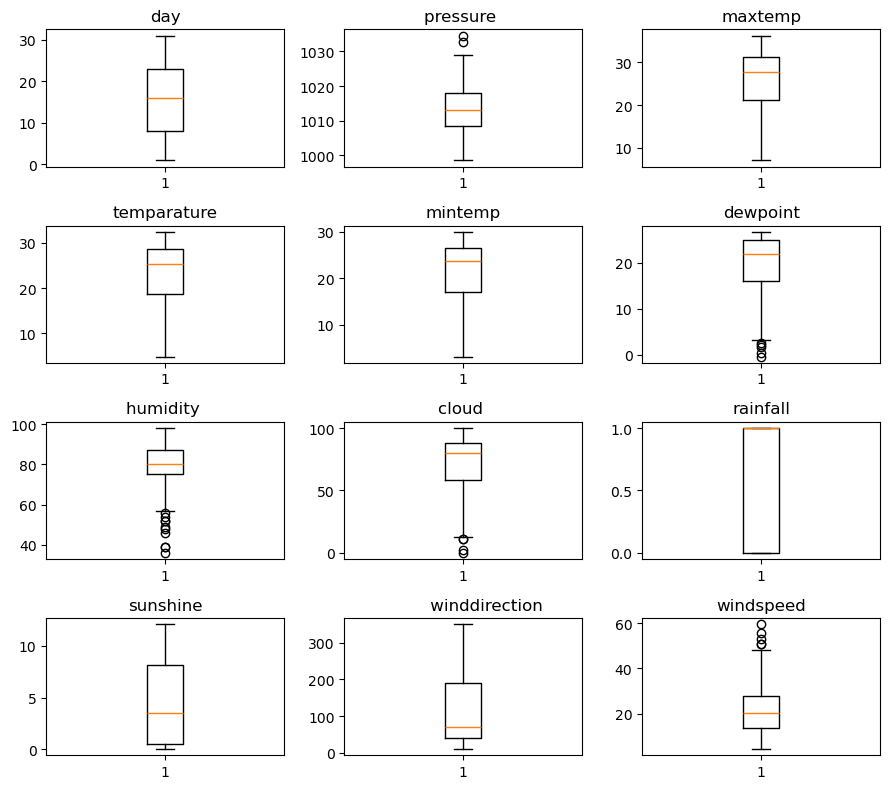

In [9]:
n = len(df.columns)
n_cols = 3
n_rows = math.ceil(n / n_cols)

plt.figure(figsize=(n_cols * 3, n_rows *2))
for i, col in enumerate(df.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [10]:
for col in df.columns:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    
    Lower_fience = Q1 - 1.5 * IQR
    Higher_fience = Q3 + 1.5 * IQR
    
    Lower_Outliers = df[df[col] < Lower_fience][col].values
    Higher_Outliers = df[df[col] > Higher_fience][col].values
    
    df[col].replace(Lower_Outliers , Lower_fience , inplace=True)
    df[col].replace(Higher_Outliers , Higher_fience , inplace=True)

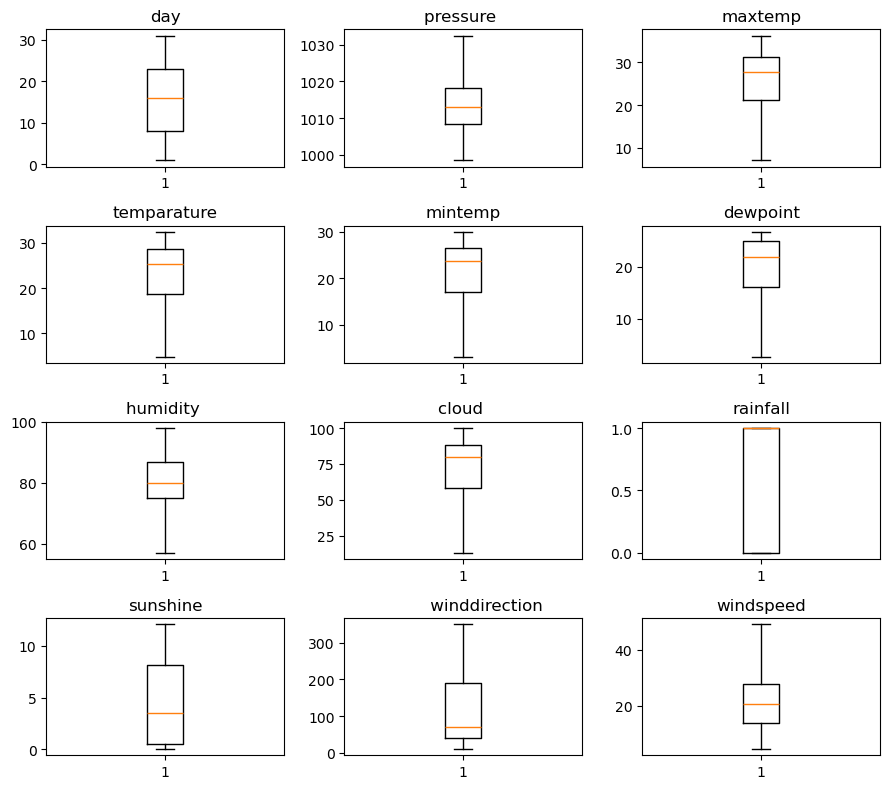

In [11]:
n = len(df.columns)
n_cols = 3
n_rows = math.ceil(n / n_cols)

plt.figure(figsize=(n_cols * 3, n_rows *2))
for i, col in enumerate(df.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [12]:
X = df.drop("rainfall", axis=1)
y = df["rainfall"]

In [13]:
percentages = y.value_counts() / df.shape[0] * 100
print(percentages.round(2))

y.value_counts()

rainfall
1    67.95
0    32.05
Name: count, dtype: float64


rainfall
1    248
0    117
Name: count, dtype: int64

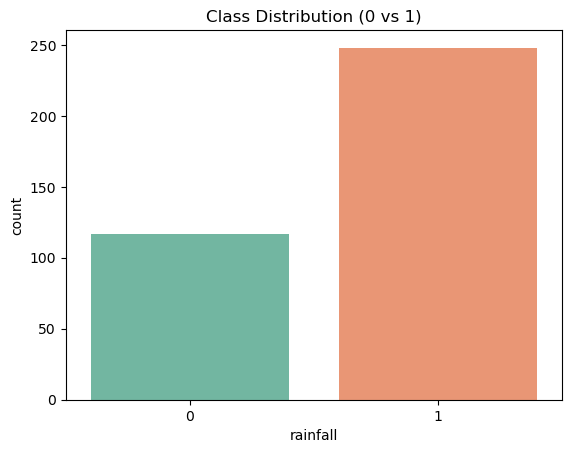

In [14]:
sns.countplot(x=y , palette="Set2")
plt.title("Class Distribution (0 vs 1)")
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = LogisticRegression(random_state=42  , max_iter=1000)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [17]:
model.score(X_test, y_test)

0.7671232876712328

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.44      0.48        18
           1       0.83      0.87      0.85        55

    accuracy                           0.77        73
   macro avg       0.68      0.66      0.67        73
weighted avg       0.76      0.77      0.76        73



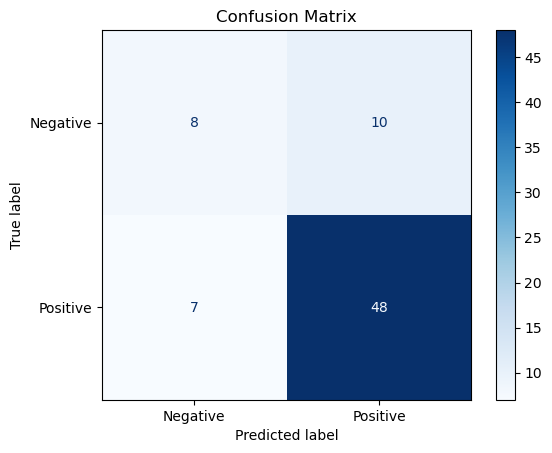

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test ,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [20]:
smote = SMOTE(random_state=42,
              sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X, y)

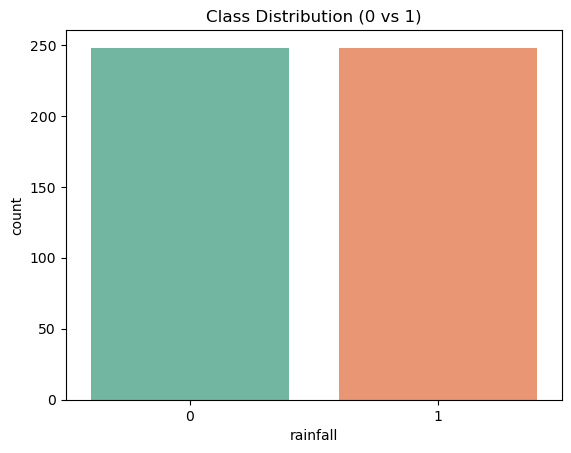

In [21]:
sns.countplot(x=y_resampled , palette="Set2")
plt.title("Class Distribution (0 vs 1)")
plt.show()

In [22]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [23]:
model_smote = LogisticRegression(random_state=42  , max_iter=1000)
model_smote.fit(X_train_resampled, y_train_resampled)
y_pred_resampled = model_smote.predict(X_test_resampled)
y_pred_resampled

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [24]:
print(classification_report(y_test_resampled, y_pred_resampled))

              precision    recall  f1-score   support

           0       0.96      0.74      0.83        58
           1       0.73      0.95      0.82        42

    accuracy                           0.83       100
   macro avg       0.84      0.85      0.83       100
weighted avg       0.86      0.83      0.83       100



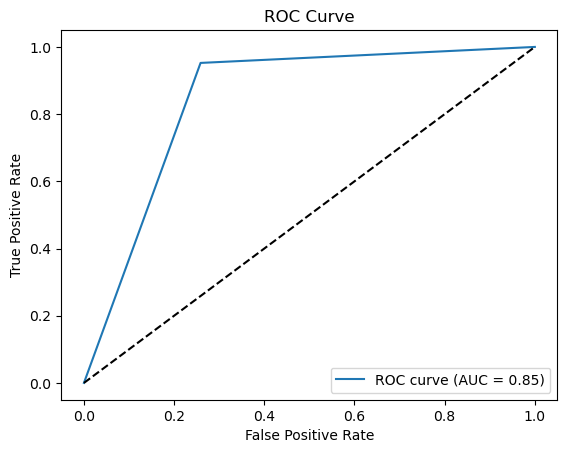

In [25]:

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test_resampled, y_pred_resampled)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

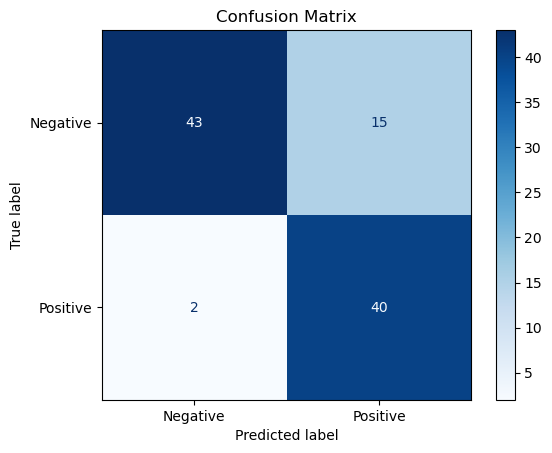

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_resampled, y_pred_resampled)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

#